In [1]:
import pandas as pd
data=pd.read_csv('03_2010_ 1333 variables.csv')

In [2]:
data[data.Date<'2012-01-01'].shape

(35064, 1343)

In [3]:
data = data.drop('Unnamed: 0',axis=1)

In [4]:
#Separating catagorical and numerical columns
binary_cols=['holiday','Temp.51.7.','DayTime','NightTime']
other_cols=['Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day']
need_zscore   = [x for x in data.columns if x not in binary_cols+other_cols]

In [5]:
for col in need_zscore:
    data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)

In [6]:
box=pd.read_csv('04_Box_Cox_load.csv',index_col=False)

In [7]:
box=box.drop('Unnamed: 0',axis=1)

In [8]:
box.index=pd.Int64Index(box.index)

In [9]:
data.index=pd.Int64Index(data.index)

In [10]:
box_data=pd.merge(data, box, left_on=data.index,right_on=box.index,how='left')

In [11]:
box_data = box_data.drop('key_0',axis=1)

In [12]:
box_data[box_data['Date']>='2011-12-31']

,Date,Hour,Temperature,Load,trend,month,weekday,holiday,TempDistance,Temp.51.7.,...,NightTime.TemperatureLag24,NightTime.Temperature_Lag24_2,NightTime.Temperature_Lag24_3,NightTime.TemperatureLag48,NightTime.Temperature_Lag48_2,NightTime.Temperature_Lag48_3,NightTime.Temperature.2,NightTime.Temperature.3,NightTime.Temperature.1.2,box
35040,2011-12-31,1,-0.732274,-0.720468,1.036236,December,Saturday,0,-0.083493,0,...,0.320060,-0.140492,-0.344241,0.271087,-0.187155,-0.375523,-0.042382,-0.274392,0.728733,33.788346
35041,2011-12-31,2,-0.764484,-0.954374,1.036315,December,Saturday,0,-0.023890,0,...,0.380361,-0.080336,-0.302078,0.331742,-0.129058,-0.336427,-0.067376,-0.292690,0.713024,33.282733
35042,2011-12-31,3,-0.813287,-1.113620,1.036394,December,Saturday,0,0.066418,0,...,0.416687,-0.042658,-0.274626,0.356077,-0.104902,-0.319583,-0.104346,-0.319117,0.688936,32.925719
35043,2011-12-31,4,-0.878684,-1.218058,1.036473,December,Saturday,0,0.187430,0,...,0.477352,0.022675,-0.225194,0.380048,-0.080631,-0.302322,-0.152190,-0.352147,0.656089,32.685532
35044,2011-12-31,5,-0.959698,-1.249993,1.036552,December,Saturday,0,0.337341,0,...,0.489340,0.035942,-0.214881,0.368062,-0.092825,-0.311036,-0.208766,-0.389434,0.614439,32.611087
35045,2011-12-31,6,-0.976291,-1.253446,1.036631,December,Saturday,0,0.368045,0,...,0.550004,0.104888,-0.159831,0.368062,-0.092825,-0.311036,-0.219985,-0.396592,0.605770,32.603010
35046,2011-12-31,7,-1.008501,-1.142103,1.036710,December,Saturday,0,0.427648,0,...,-0.866715,-0.717786,-0.607245,-0.866830,-0.717971,-0.607431,-0.717636,-0.607075,-0.945145,32.860702
35047,2011-12-31,8,-1.008501,-0.982425,1.036789,December,Saturday,0,0.427648,0,...,-0.866715,-0.717786,-0.607245,-0.866830,-0.717971,-0.607431,-0.717636,-0.607075,-0.945145,33.220625
35048,2011-12-31,9,-0.894789,-0.903881,1.036868,December,Saturday,0,0.217232,0,...,-0.866715,-0.717786,-0.607245,-0.866830,-0.717971,-0.607431,-0.717636,-0.607075,-0.945145,33.393714
35049,2011-12-31,10,-0.797182,-0.847347,1.036947,December,Saturday,0,0.036616,0,...,-0.866715,-0.717786,-0.607245,-0.866830,-0.717971,-0.607431,-0.717636,-0.607075,-0.945145,33.516753


In [13]:
box_data.columns.values

array(['Date', 'Hour', 'Temperature', ..., 'NightTime.Temperature.3',
       'NightTime.Temperature.1.2', 'box'], dtype=object)

In [14]:
box_data['Load_BoxCox']=box_data['box']

In [15]:
box_data = box_data.drop('box',axis=1)

In [16]:
sum(data.isnull().sum()>12)

337

In [17]:
train_set = box_data[box_data['Date']<'2011-01-01']
test_set = box_data[(box_data['Date']>='2011-01-01') & (box_data['Date']<'2012-01-01')]

In [18]:
train_set=train_set.dropna()

In [19]:
X_train_set = train_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day'],axis=1).values
Y_train_set = train_set['Load_BoxCox'].values

X_test_set = test_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day'],axis=1).values
Y_test_set = test_set['Load_BoxCox'].values

# X_train_set = train_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week'],axis=1).values
# Y_train_set = train_set['Load_BoxCox'].values

# X_test_set = test_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week'],axis=1).values
# Y_test_set = test_set['Load_BoxCox'].values

In [20]:
tset=train_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day'],axis=1)

In [21]:
tset.shape

(26256, 1333)

In [22]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.feature_selection import RFECV

In [23]:
# # params = {'n_estimators':100, 'max_depth':8, 'min_samples_split':500, 'min_sample_leaf':50,'learning_rate':.2, 
# #                 'loss':'ls'}
# GB = GradientBoostingRegressor()
# model = GB

# rfecv = RFECV(estimator=model, step=1, verbose=0)
# rfecv.fit(X_train_set, Y_train_set)

# var_ranking = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), significant)),
#                             columns = ['ranking', 'variable'])
# pd.options.display.max_rows = 150
# print(var_ranking)

In [24]:
# var_selected=var_ranking[var_ranking.ranking==1]
# print(var_selected)

In [25]:
def custom_asymmetric_train(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    grad = np.where(residual<0, -2*10.0*residual, -2*residual)
    hess = np.where(residual<0, 2*10.0, 2.0)
    return grad, hess

def custom_asymmetric_valid(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    loss = np.where(residual < 0, (residual**2)*10.0, residual**2) 
    return "custom_asymmetric_eval", np.mean(loss), False

In [28]:
import lightgbm
# default lightgbm model with sklearn api
import numpy as np

gbm = lightgbm.LGBMRegressor() 

# updating objective function to custom
# default is "regression"
# also adding metrics to check different scores
gbm.set_params(**{'objective': custom_asymmetric_train}, metrics = ["mape"])

# fitting model 
gbm.fit(
    X_train_set,
    Y_train_set,
#     eval_set=[(X_test_set, Y_test_set)],
    eval_metric=custom_asymmetric_valid,
    verbose=False,
)

y_pred = gbm.predict(X_test_set)


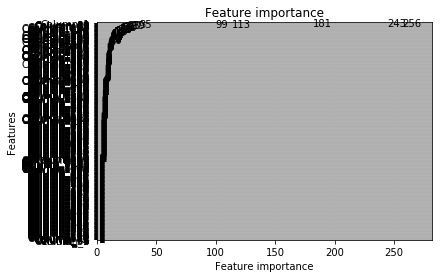

In [30]:
import matplotlib.pyplot as plt
lightgbm.plot_importance(gbm,height=0.2)
plt.show()

importance_type (string, optional (default="split")) – How the importance is calculated. If “split”, result contains numbers of times the feature is used in a model. If “gain”, result contains total gains of splits which use the feature.

In [29]:
# gbm.feature_importances_
var_rank=pd.DataFrame(tset.columns.values,columns=['Var_Name'])

In [30]:
rank=pd.Series(gbm.feature_importances_)
var_rank['rank']=rank

In [31]:
var_rank = var_rank.sort_values(by='rank',ascending=False)

In [32]:
var_rank=var_rank.reset_index().drop('index',axis=1)

In [33]:
var_rank[var_rank['rank']==0].Var_Name.values

array(['DayTime.Temperature_Lag5_3', 'DayTime.temp_max_12_2',
       'DayTime.Temperature_Lag6_3', 'DayTime.Temperature_Lag5_2',
       'Temp.51.7..Temperature.2', 'Temp.51.7..Temperature.3',
       'DayTime.Temperature_Lag6_2', 'DayTime.temp_max_12_0.5',
       'DayTime.TemperatureLag5', 'DayTime.Temperature_Lag1_3',
       'DayTime.temp_std_12_0.5', 'Temp.51.7..Temperature.1.2',
       'DayTime.temp_max_6_3', 'DayTime.temp_min_12_0.5',
       'DayTime.Temperature_Lag3_3', 'DayTime.temp_min_12_2',
       'DayTime.Temperature_Lag2_3', 'DayTime.temp_min_12_3',
       'DayTime.Temperature_Lag2_2', 'DayTime.temp_min_6_3',
       'DayTime.temp_min_6_2', 'DayTime.TemperatureLag4',
       'DayTime.temp_min_6_0.5', 'DayTime.TemperatureLag2',
       'DayTime.temp_min_24_0.5', 'DayTime.Temperature_Lag4_2',
       'DayTime.temp_min_24_3', 'DayTime.temp_max_24_2',
       'DayTime.temp_max_24_0.5', 'DayTime.Temperature_Lag1_2',
       'DayTime.temp_max_12_3', 'DayTime.Temperature_Lag4_3',
       '

In [34]:
new_selected_features_df = var_rank[var_rank['rank']>0]

In [35]:
new_selected_features_df.shape

(618, 2)

In [36]:
y_pred
y_pred_t = pd.Series(y_pred)

In [37]:
y_pred_t

0       33.225682
1       32.878772
2       32.598720
3       32.619990
4       32.500179
5       32.725594
6       32.796479
7       33.686952
8       33.822211
9       34.401136
10      34.892692
11      34.992426
12      35.000617
13      35.071923
14      35.174157
15      35.057123
16      35.049550
17      35.452150
18      36.064535
19      36.092631
20      35.924389
21      35.914369
22      35.621790
23      35.171759
24      34.900974
25      34.479638
26      34.295301
27      34.007571
28      33.958673
29      33.951737
          ...    
8730    35.499132
8731    35.615162
8732    35.425609
8733    35.357633
8734    34.793632
8735    34.713361
8736    33.253299
8737    32.982913
8738    32.895570
8739    32.801183
8740    32.980439
8741    32.919615
8742    32.880827
8743    33.264834
8744    33.443859
8745    33.647049
8746    33.664086
8747    33.972180
8748    33.989685
8749    33.980555
8750    33.952221
8751    33.920321
8752    33.819951
8753    34.247400
8754    34

In [38]:
df=pd.DataFrame(Y_test_set,columns=['Test_Y'])
df['Pred_Y_Test']=y_pred

In [39]:
y_train_fit = gbm.predict(X_train_set)
y_pred_train = pd.Series(y_train_fit)

In [40]:
y_pred_train

0        35.769094
1        35.555172
2        35.282669
3        35.153678
4        35.140988
5        35.402455
6        35.872335
7        36.800129
8        37.009850
9        37.169758
10       37.090982
11       37.159036
12       37.117013
13       37.052730
14       36.936641
15       36.859645
16       36.899469
17       37.229075
18       37.775167
19       37.684061
20       37.532502
21       37.328122
22       36.858194
23       36.345817
24       35.305134
25       35.098860
26       34.578534
27       34.518414
28       34.453189
29       34.669052
           ...    
26226    35.992824
26227    36.024240
26228    35.863236
26229    35.710413
26230    35.096799
26231    34.399428
26232    33.529614
26233    32.910755
26234    32.588244
26235    32.533873
26236    32.444590
26237    32.379992
26238    32.658689
26239    33.415563
26240    33.860625
26241    34.178541
26242    34.164032
26243    34.257881
26244    34.266284
26245    34.315949
26246    34.298201
26247    34.

In [41]:
df_t=pd.DataFrame(Y_train_set,columns=['Train_Y'])

In [42]:
df_t

,Train_Y
0,36.003434
1,35.533876
2,35.281840
3,35.141221
4,35.146125
5,35.329435
6,35.821265
7,36.614331
8,37.003447
9,37.096300


In [43]:
df_t['Pred_Y_Train']=y_pred_train

In [44]:
df

,Test_Y,Pred_Y_Test
0,33.470880,33.225682
1,33.129259,32.878772
2,32.874523,32.598720
3,32.605030,32.619990
4,32.556459,32.500179
5,32.573684,32.725594
6,32.807236,32.796479
7,33.079915,33.686952
8,33.279874,33.822211
9,33.506470,34.401136


In [45]:
df.to_csv('test_result.csv')
df_t.to_csv('train_result.csv')